# Loan Approval Prediction

In [56]:
import os
import pandas as pd

In [57]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\DS_Projects'

In [58]:
data=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\DS_Projects\\LoanApproval.xls')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [59]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [61]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(method='ffill', inplace=True)

data['Dependents'].fillna(method='bfill',inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [62]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
data.drop(['Loan_ID'],axis=1,inplace=True)

# Plotting graphs

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

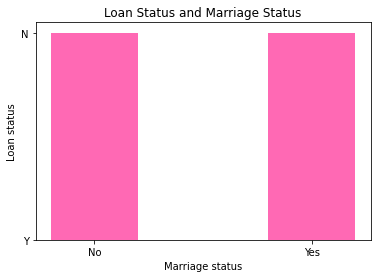

In [65]:
plt.figure(figsize=(6,4))
plt.bar(data['Married'],data['Loan_Status'], color='hotpink',width=0.4)
plt.title("Loan Status and Marriage Status")
plt.xlabel("Marriage status")
plt.ylabel("Loan status")
plt.show()

Text(0, 0.5, 'Loan Amount')

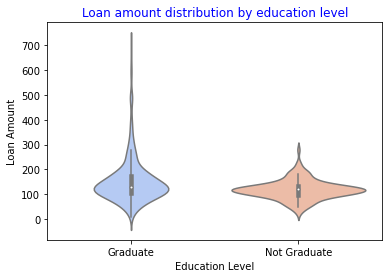

In [66]:
sns.violinplot(x=data['Education'], y=data['LoanAmount'], palette='coolwarm')
plt.title("Loan amount distribution by education level", color='Blue')
plt.xlabel("Education Level")
plt.ylabel("Loan Amount")

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

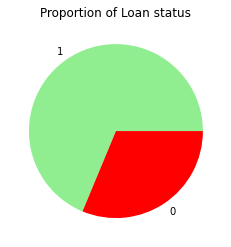

In [68]:
loan_counts=data['Loan_Status'].value_counts()
plt.pie(loan_counts,labels=loan_counts.index,colors=['lightgreen','red'])
plt.title("Proportion of Loan status")
plt.show()

Text(0, 0.5, 'Applicant Income')

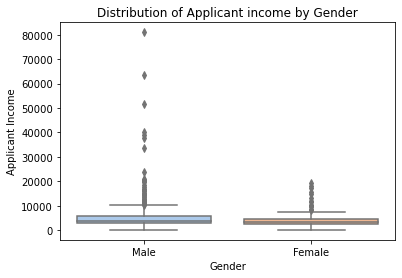

In [69]:
sns.boxplot(x=data['Gender'],y=data['ApplicantIncome'],palette='pastel')
plt.title("Distribution of Applicant income by Gender")
plt.xlabel("Gender")
plt.ylabel("Applicant Income")

Text(0, 0.5, 'Applicant Income')

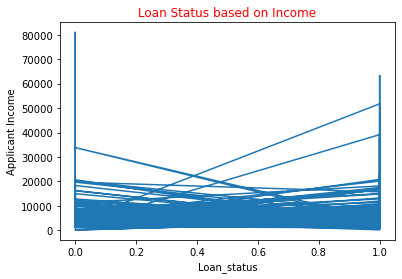

In [70]:
plt.plot(data['Loan_Status'],data['ApplicantIncome'])
plt.title("Loan Status based on Income",color='red')
plt.xlabel('Loan_status')
plt.ylabel('Applicant Income')

# Imbalance dataset

In [71]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# LabelEncoding

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [73]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
v=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [75]:
for i in v:
    data[i]=le.fit_transform(data[i])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,73,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1
612,1,1,2,0,0,422,0,132,8,1,2,1


In [76]:
X=data.iloc[:,:-1]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,376,0,73,8,1,2
1,1,1,1,0,0,306,60,81,8,1,0
2,1,1,0,0,1,139,0,26,8,1,2
3,1,1,0,1,0,90,160,73,8,1,2
4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0
610,1,1,3,0,0,275,0,7,5,1,0
611,1,1,1,0,0,431,3,162,8,1,2
612,1,1,2,0,0,422,0,132,8,1,2


In [77]:
y=data.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# Over sampling

In [78]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
x_os,y_os=os.fit_resample(X,y)

In [79]:
x_os

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,376,0,73,8,1,2
1,1,1,1,0,0,306,60,81,8,1,0
2,1,1,0,0,1,139,0,26,8,1,2
3,1,1,0,1,0,90,160,73,8,1,2
4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
839,0,0,0,0,0,458,88,155,8,1,0
840,0,0,1,0,0,439,0,163,8,0,1
841,1,0,0,0,0,81,0,45,8,1,1
842,0,0,1,0,0,211,0,35,8,0,0


In [80]:
y_os.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Data Normalization

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(X)
x_scaler

array([[1.        , 0.        , 0.        , ..., 0.88888889, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.88888889, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.88888889, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.88888889, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.88888889, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.88888889, 0.        ,
        0.5       ]])

# Train Test split

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=1)

# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

# Model's performance measure

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.46      0.55        61
           1       0.77      0.90      0.83       124

    accuracy                           0.75       185
   macro avg       0.73      0.68      0.69       185
weighted avg       0.74      0.75      0.74       185



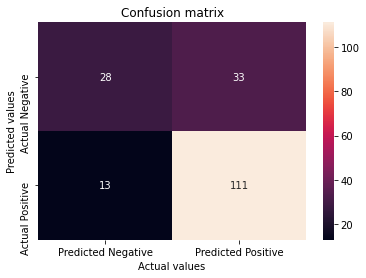

In [87]:
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True,fmt='d',xticklabels=["Predicted Negative","Predicted Positive"],yticklabels=["Actual Negative","Actual Positive"])
plt.title("Confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

# SVC

In [88]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [89]:
y_p=model.predict(X_test)
y_p

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_p))

0.7891891891891892


In [91]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



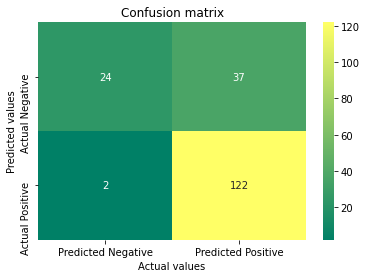

In [92]:
cn=confusion_matrix(y_test,y_p)
sns.heatmap(cn,annot=True,fmt='d',cmap='summer',xticklabels=["Predicted Negative","Predicted Positive"],yticklabels=["Actual Negative","Actual Positive"])
plt.title("Confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [93]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

('Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

# Naive bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [95]:
y_predict=nb.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [96]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.7891891891891892


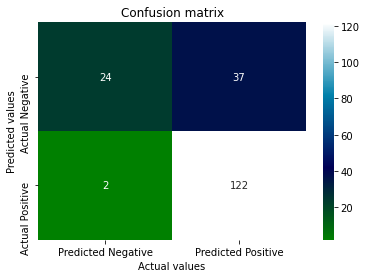

In [98]:
cn=confusion_matrix(y_test,y_predict)
sns.heatmap(cn,annot=True,fmt='d',cmap='ocean',xticklabels=["Predicted Negative","Predicted Positive"],yticklabels=["Actual Negative","Actual Positive"])
plt.title("Confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

# Decision Tree classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini', random_state=20)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=20)

In [100]:
y_predi=dtc.predict(X_test)
y_predi

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0])

In [101]:
print(classification_report(y_test,y_predi))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59        61
           1       0.80      0.78      0.79       124

    accuracy                           0.72       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.73      0.72      0.73       185



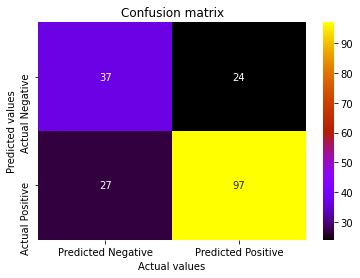

In [102]:
cn=confusion_matrix(y_test,y_predi)
sns.heatmap(cn,annot=True,fmt='d',cmap='gnuplot',xticklabels=["Predicted Negative","Predicted Positive"],yticklabels=["Actual Negative","Actual Positive"])
plt.title("Confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
rf=RandomForestClassifier(random_state=1)
ada=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)

In [115]:
models=[rf,ada,gb]
for model in models:
    print(model)
    model.fit(X_train,y_train)
    y_predic=model.predict(X_test)
    print(classification_report(y_test,y_predic))
    


RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        61
           1       0.77      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.78      0.78      0.76       185

AdaBoostClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        61
           1       0.78      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.78      0.78      0.77       185

GradientBoostingClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.76      0.46      0.57        61
           1       0.78      0.93      0.85       124

    accuracy                           0.77       185
   macro av